# NIFTY 500 Data Analysis

The dataset used is taken from the open datasets available on Kaggle (Link given below). An Exploratory analysis is performed on the dataset and few interesting observations and inferences are made in this notebook.
https://www.kaggle.com/datasets/iamsouravbanerjee/nifty500-stocks-dataset

This work is for certification obtained from the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Downloading the Dataset

The dataset has been downloaded from kaggle. Link is given below.
https://www.kaggle.com/datasets/iamsouravbanerjee/nifty500-stocks-dataset
It is a .csv file and contains 501 rows and 17 columns.

In [180]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [181]:
dataset_url = 'https://www.kaggle.com/datasets/iamsouravbanerjee/nifty500-stocks-dataset' 

In [182]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./nifty500-stocks-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [183]:
data_dir = './nifty500-stocks-dataset'

In [184]:
import os
os.listdir(data_dir)

['List of all the NIFTY-500 Companies.txt', 'nifty_500.csv']

Let us save and upload our work to Jovian before continuing.

In [185]:
project_name = "nifty500-data-analysis" # change this (use lowercase letters and hyphens only)

In [186]:
!pip install jovian --upgrade -q

In [187]:
import jovian

In [188]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilpurao1998/nifty500-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilpurao1998/nifty500-data-analysis


'https://jovian.ai/nikhilpurao1998/nifty500-data-analysis'

## Data Preparation and Cleaning

We will be checking for the missing data in the given dataset and perform any cleaning that is required.



In [189]:
import pandas as pd

In [190]:
nifty500_df = pd.read_csv('./nifty500-stocks-dataset/nifty_500.csv')

In [191]:
nifty500_df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [192]:
# Checking for shape of the dataframe
nifty500_df.shape

(501, 17)

In [193]:
# Checking for info of the dataframe
nifty500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

### In columns such as '365 Day Percentage Change' or 'Percentage Change', if there was no change throughout the day, the value is filled as '-'. We will replace it with 0.

In [194]:
nifty500_df['Change'].replace('-',0,inplace = True)
nifty500_df['Percentage Change'].replace('-',0,inplace = True)
nifty500_df['365 Day Percentage Change'].replace('-',0,inplace = True)
nifty500_df['30 Day Percentage Change'].replace('-',0,inplace = True)

### Some data clean is still required though. The datatypes of few columns which should be numeric isn't, e.g. '365 Day Percentage Change', 'Percentage Change', etc.

In [195]:
nifty500_df['Percentage Change'] = nifty500_df['Percentage Change'].astype(float)
nifty500_df['365 Day Percentage Change'] = nifty500_df['365 Day Percentage Change'].astype(float)
nifty500_df['30 Day Percentage Change'] = nifty500_df['30 Day Percentage Change'].astype(float)

In [196]:
# Checking for a description of given data
nifty500_df.describe()

,Open,High,Low,Previous Close,Last Traded Price,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000,501.000000,501.000000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,0.384850,2.580350e+06,8.635146e+08,2182.632196,1281.628982,-6.042295,-6.658263
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,2.139495,9.407021e+06,4.335973e+09,5728.930152,3850.529646,31.989372,8.855634
min,6.750000,6.950000,6.700000,6.850000,6.800000,-14.830000,1.507000e+03,2.587223e+06,13.100000,4.550000,-91.140000,-52.720000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,-0.790000,7.740500e+04,4.502265e+07,328.700000,166.800000,-25.920000,-11.120000
50%,551.100000,569.100000,547.000000,554.750000,563.000000,0.450000,3.296100e+05,1.533133e+08,818.000000,438.050000,-8.980000,-5.940000
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.720000,1.235612e+06,6.644570e+08,2096.750000,1128.800000,7.230000,-1.410000
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,6.500000,1.257883e+08,9.211987e+10,87550.000000,63000.000000,138.900000,20.850000


### Here we can be assured that the there are no missing values in the given dataset.

In [197]:
nifty500_df.isna().sum()

Company Name                 0
Symbol                       0
Industry                     0
Series                       0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            0
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    0
30 Day Percentage Change     0
dtype: int64

### There are total 21 unique industries in NIFTY 500 index. All of them are listed below

In [198]:
nifty500_df['Industry'].unique()

array(['Diversified', 'Healthcare', 'Financial Services', 'Capital Goods',
       'Consumer Services', 'Construction Materials', 'Metals & Mining',
       'Power', 'Services', 'Fast Moving Consumer Goods',
       'Oil Gas & Consumable Fuels', 'Information Technology',
       'Chemicals', 'Textiles', 'Automobile and Auto Components',
       'Consumer Durables', 'Telecommunication', 'Realty',
       'Forest Materials', 'Construction',
       'Media Entertainment & Publication'], dtype=object)

In [199]:
import jovian

In [200]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilpurao1998/nifty500-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilpurao1998/nifty500-data-analysis


'https://jovian.ai/nikhilpurao1998/nifty500-data-analysis'

## Exploratory Analysis and Visualization

In this section, we will be:
1. Plotting heat map for Correlation.
2. Comparing High vs Low
3. Open Vs Previous Close
4. Detecting Outlieers from Dataset



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [201]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Plotting top 10 gainers today

<AxesSubplot:xlabel='Percentage Change', ylabel='Company Name'>

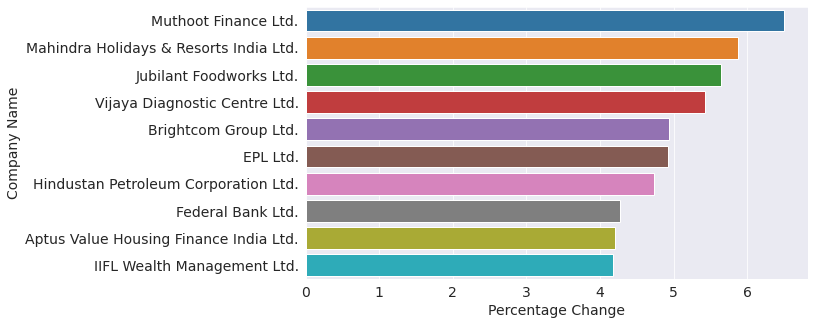

In [202]:
temp_df = nifty500_df.sort_values('Percentage Change',ascending = False).head(10)
sns.barplot(y = 'Company Name', x = 'Percentage Change', data = temp_df)

#### Here we can make an inference that 'Muthoot Finance Ltd.' is the top gainer today. The above data was plotted by sorting value in descending order for 'Percentage Change' data series of the data frame.

### Plotting top 10 Losers today

<AxesSubplot:xlabel='Percentage Change', ylabel='Company Name'>

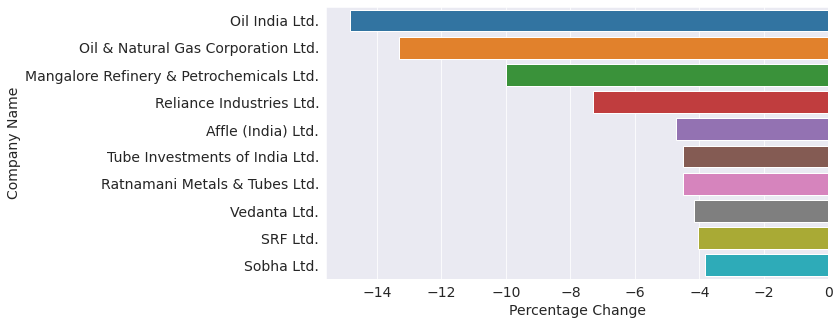

In [203]:
temp_df = nifty500_df.sort_values('Percentage Change',ascending = True).head(10)
sns.barplot(y = 'Company Name', x = 'Percentage Change', data = temp_df)

#### We can make an inference that top 3 losers today are of companies that deal in Crude Oil and refinery products. The above data was plotted by sorting value in ascending order for 'Percentage Change' data series of the data frame.

### Plotting top 10 gainers of the month

<AxesSubplot:xlabel='30 Day Percentage Change', ylabel='Company Name'>

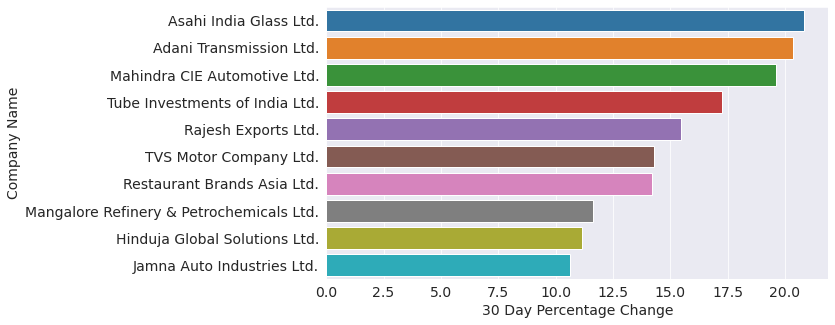

In [204]:
temp_df = nifty500_df.sort_values('30 Day Percentage Change',ascending = False).head(10)
sns.barplot(y = 'Company Name', x = '30 Day Percentage Change', data = temp_df)

#### We can make an inference that 'Asahi India Glass Ltd.' & 'Adani Transmission Ltd.' have gained over 20% in a month. The above data was plotted by sorting value in descending order for '30 Day Percentage Change' data series of the data frame.

### Plotting top 10 Losers of the month

<AxesSubplot:xlabel='30 Day Percentage Change', ylabel='Company Name'>

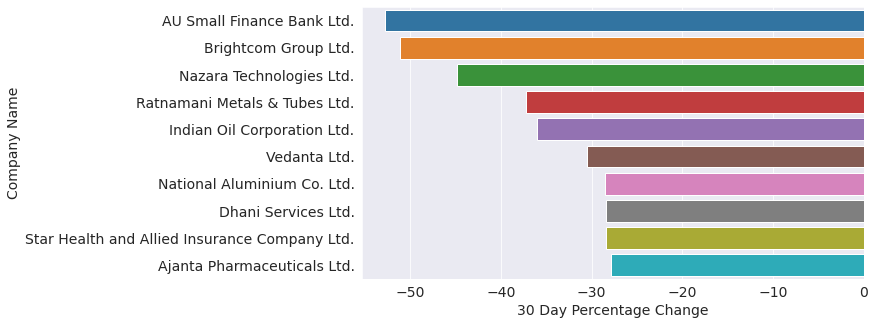

In [205]:
temp_df = nifty500_df.sort_values('30 Day Percentage Change',ascending = True).head(10)
sns.barplot(y = 'Company Name', x = '30 Day Percentage Change', data = temp_df)

#### We can infer that 'AU Small Finance Bank Ltd.' & 'Brightcom Group Ltd.' have lost over 50% in the last month. The above data was plotted by sorting value in ascending order for '30 Day Percentage Change' data series of the data frame.

Let us save and upload our work to Jovian before continuing

In [206]:
import jovian

In [207]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilpurao1998/nifty500-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilpurao1998/nifty500-data-analysis


'https://jovian.ai/nikhilpurao1998/nifty500-data-analysis'

## Asking and Answering Questions

In this section, we will be analysing the data and answer the following questions:
1. What sectors in NIFTY 500 have the largest share volume ?
2. Does the share volume directly translates to value ?
3. How many stocks had a major breakout in a span of a year ?
4. How many companies in each sector ? Does more number of companies in a sector indicate more value ?



#### Q1: What sectors in NIFTY 500 have the largest share volume ?

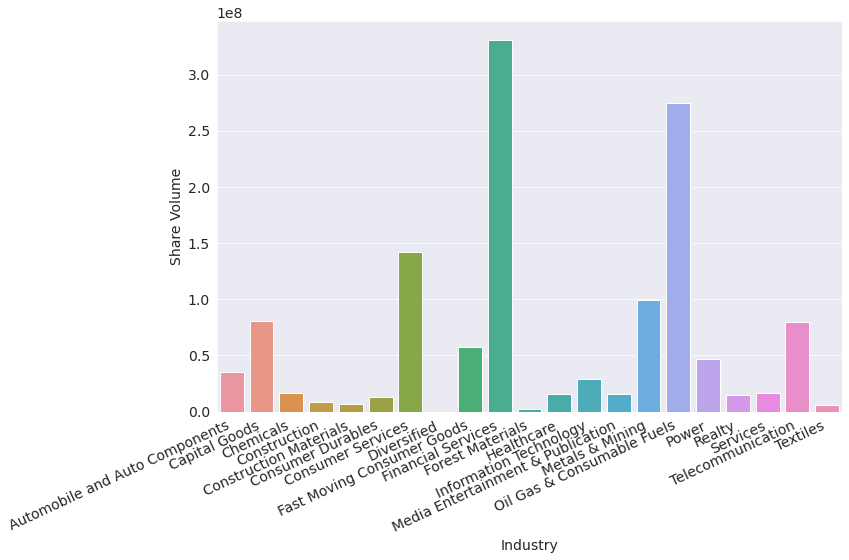

In [208]:
temp_df = nifty500_df.groupby('Industry').sum()
temp_df = temp_df.reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Industry', y = 'Share Volume', data = temp_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.tight_layout()

#### From the figure, it can be seen that Financial Services and Oil Gas & Consumable Fuels contribute to the largest share volume in NIFTY 500 index.

#### Q2: Does the share volume directly translates to value ?

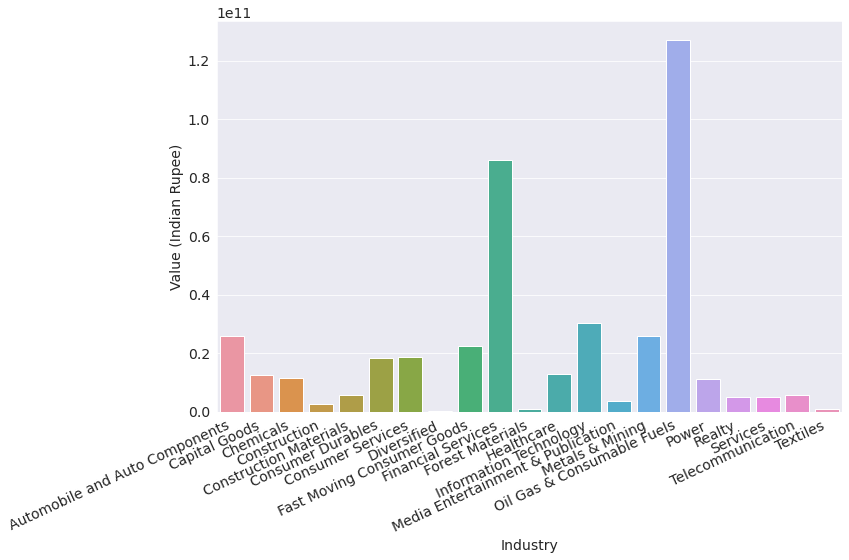

In [209]:
temp_df = nifty500_df.groupby('Industry').sum()
temp_df = temp_df.reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Industry', y = 'Value (Indian Rupee)', data = temp_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.tight_layout()

#### We can clearly see that, even though Financial Services sector is the major contributor in share volume but Oil Gas & Consumable Fuels is valued at much greater. Also share volume of 'IT' is not as much as Metals & Mining but it is valued higher than the later.

#### Q3: How many stocks had a major breakout in a span of a year ?

In [210]:
nifty500_df.sort_values('365 Day Percentage Change',ascending = False).head(10)

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
148,Gujarat Fluorochemicals Ltd.,FLUOROCHEM,Chemicals,EQ,2800.25,2807.40,2696.95,2774.95,2755.00,-19.95,-0.72,44957,1.242535e+08,3198.90,1034.10,138.90,-3.89
461,Trident Ltd.,TRIDENT,Textiles,EQ,38.65,38.80,37.65,38.70,38.20,-0.50,-1.29,2633568,1.003653e+08,70.35,16.30,136.70,-18.87
268,KPIT Technologies Ltd.,KPITTECH,Information Technology,EQ,512.00,514.95,495.40,517.65,500.90,-16.75,-3.24,940281,4.717390e+08,801.00,245.20,99.33,-2.39
277,Linde India Ltd.,LINDEINDIA,Chemicals,EQ,3150.00,3248.00,3111.00,3198.15,3224.00,25.85,0.81,40600,1.294052e+08,4190.00,1564.10,94.42,6.85
60,Bharat Dynamics Ltd.,BDL,Capital Goods,EQ,677.00,679.95,660.05,681.25,668.00,-13.25,-1.94,693286,4.624426e+08,904.90,356.85,90.32,-13.07
441,Tata Elxsi Ltd.,TATAELXSI,Information Technology,EQ,8170.55,8239.00,8022.00,8170.55,8155.15,-15.40,-0.19,270194,2.196669e+09,9420.00,4033.10,89.82,-2.51
93,Chalet Hotels Ltd.,CHALET,Consumer Services,EQ,314.80,331.80,310.05,314.65,327.15,12.50,3.97,866335,2.808485e+08,332.70,159.05,77.57,5.92
312,Mangalore Refinery & Petrochemicals Ltd.,MRPL,Oil Gas & Consumable Fuels,EQ,88.05,91.25,81.55,90.60,81.55,-9.05,-9.99,26739501,2.226331e+09,127.65,37.05,76.61,11.65
132,Elgi Equipments Ltd.,ELGIEQUIP,Capital Goods,EQ,351.50,362.40,344.35,358.50,347.00,-11.50,-3.21,204302,7.192248e+07,422.30,191.30,73.27,4.11
412,Solar Industries India Ltd.,SOLARINDS,Chemicals,EQ,2725.20,2769.95,2702.20,2745.30,2715.00,-30.30,-1.10,53477,1.456521e+08,3189.95,1550.00,73.21,4.78


#### We can infer that 'Gujarat Flourochemicals Ltd.' & 'Trident Ltd.' have grown over 130% in an year. It can be seen in '365 Day Percentage Change' of the above data frame.

#### Q4: How many companies in each sector ? Does more number of companies in a sector indicate more value ?

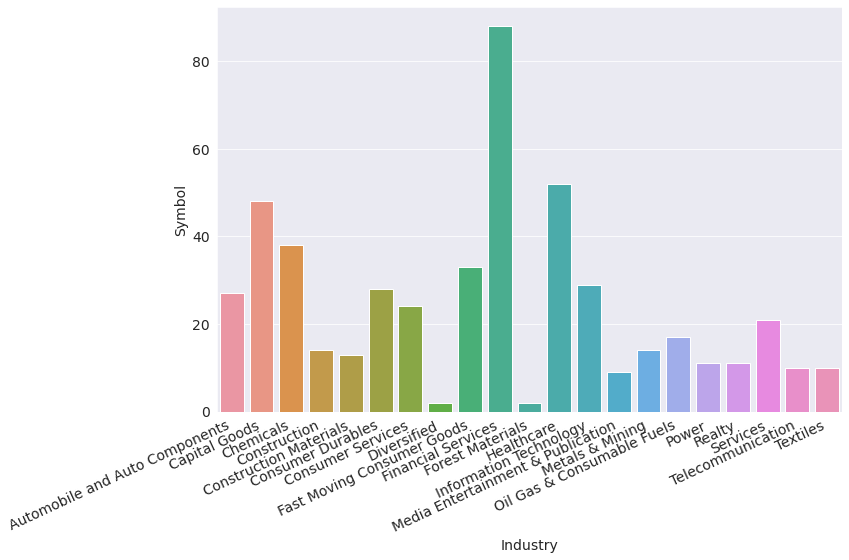

In [211]:
temp_df = nifty500_df.groupby('Industry').count().reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Industry', y = 'Symbol', data = temp_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.tight_layout()

#### As we can see there are more number of companies in 'Financial Services' and it translates to both 'share volume' as well as 'Value' but 'Oil Gas & Consumable Fuels' have relatively low number of companies but they contribute largely in both 'share volume' & 'Value' while opposite is the case with 'Healthcare' sector.

Let us save and upload our work to Jovian before continuing.

In [212]:
import jovian

In [213]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilpurao1998/nifty500-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilpurao1998/nifty500-data-analysis


'https://jovian.ai/nikhilpurao1998/nifty500-data-analysis'

## Inferences and Conclusion

It can be summerized that:
1. Financial Services and Oil Gas & Consumable Fuels contribute to the largest share volume in NIFTY 500 index.
2. Even though Financial Services sector is the major contributor in share volume but Oil Gas & Consumable Fuels is valued at much greater. Also share volume of 'IT' is not as much as Metals & Mining but it is valued higher than the later.
3. We can infer that 'Gujarat Flourochemicals Ltd.' & 'Trident Ltd.' have grown over 130% in an year. It can be seen in '365 Day Percentage Change' of the above data frame.
4. There are more number of companies in 'Financial Services' and it translates to both 'share volume' as well as 'Value' but 'Oil Gas & Consumable Fuels' have relatively low number of companies but they contribute largely in both 'share volume' & 'Value' while opposite is the case with 'Healthcare' sector.

In [214]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

References for the above work are listed below:
1. https://www.kaggle.com/datasets/iamsouravbanerjee/nifty500-stocks-dataset
2. https://www.kaggle.com/code/mirzahasnine/nifty-500-eda
3. https://www.kaggle.com/code/muthupalaniappan925/quick-eda
4. https://seaborn.pydata.org/tutorial/color_palettes.html
5. https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
6. https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642
7. https://jovian.ai/

In [ ]:
import jovian

In [ ]:
jovian.commit()